<a href="https://colab.research.google.com/github/catafest/colab_google/blob/master/catafest_055.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 22.5 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

In [3]:
!pip install numpy

In [4]:
!pip install geemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.9 MB/s eta 0:00:00


In [5]:
pip install earthengine-api --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.5/261.5 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for earthengine-api: filename=earthengine_api-0.1.383-py3-none-any.whl size=294257 sha256=4438b9c751e7445cb9f46b08eb6993128c87aed38d31a3b04fe25b3bbc264234
  Stored in directory: /root/.cache/pip/wheels/0a/35/d5/683483c52e80fda1940a8540c23591be3bcf4ae3a8dbae88ae
Successfully built earthengine-api
  Attempting uninstall: earthengine-api
    Found existing installation: earthengine-api 0.1.381
    Uninstalling earthengine-api-0.1.381:
      Successfully uninstalled earthengine-api-0.1.381


In [6]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 32.2 MB/s eta 0:00:00


Let's see the source code for [Fălticeni](https://ro.wikipedia.org/wiki/F%C4%83lticeni) city [România](https://ro.wikipedia.org/wiki/Rom%C3%A2nia).

Location : *47°27'35"N 26°18'0"E*

I can use Earth Engine Python client library.

In [7]:
import io
import ee
project_id = 'ee-catafest'
ee.Authenticate()
ee.Initialize(project=project_id)

import geemap.core as geemap
# fix import error StringIO
try:
    import StringIO
except ImportError:
    from io import StringIO

#print(ee.Image("NASA/NASADEM_HGT/001").get("title").getInfo())
print(ee.Image("CGIAR/SRTM90_V4").get("title").getInfo())
dataset = ee.Image('CGIAR/SRTM90_V4')
# setare model digital al elevatiei
#elevation = ee.Image("JAXA/ALOS/AW3D30/V2_2").select('AVE_DSM')
elevation = dataset.select('elevation')
slope = ee.Terrain.slope(elevation)

# Definează o hartă folosind geemap
m = geemap.Map()

# Setează centrul hărții
m.set_center(26.29892080970946, 47.45866799588983, 20)

# Definează un poligon pentru regiune
region_polygon = ee.Geometry.Polygon(
    [[26.294818878173828, 47.46019306769474],
     [26.294818878173828, 47.46118501591061],
     [26.297178268432617, 47.46118501591061],
     [26.297178268432617, 47.46019306769474]])



# Calculează înclinarea terenului (slope)
slope = ee.Terrain.slope(elevation)

# Adaugă înclinarea terenului la hartă
m.addLayer(slope, {'min': 0, 'max': 60}, 'Slope')

# Exportă imaginea de înclinare pe Google Drive în folderul curent
task = ee.batch.Export.image.toDrive(
    image=slope,
    description='Falticeni_slope_Image',
    folder='earth_engine_exports',  # Folderul în care se va salva imaginea pe Google Drive
    fileNamePrefix='falticeni',
    region=region_polygon.getInfo()['coordinates'],
    scale=15
)

# Lansează task-ul de export
task.start()

SRTM Digital Elevation Data Version 4


In [8]:
!ls -l

total 4
drwxr-xr-x 1 root root 4096 Dec  4 14:27 sample_data


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!wget https://srtm.csi.cgiar.org/wp-content/uploads/files/srtm_5x5/TIFF/srtm_42_03.zip


--2023-12-09 19:33:19--  https://srtm.csi.cgiar.org/wp-content/uploads/files/srtm_5x5/TIFF/srtm_42_03.zip
Resolving srtm.csi.cgiar.org (srtm.csi.cgiar.org)... 45.5.184.25
Connecting to srtm.csi.cgiar.org (srtm.csi.cgiar.org)|45.5.184.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31435033 (30M) [application/zip]
Saving to: ‘srtm_42_03.zip’

srtm_42_03.zip      100%[===================>]  29.98M  10.9MB/s    in 2.8s    

2023-12-09 19:33:23 (10.9 MB/s) - ‘srtm_42_03.zip’ saved [31435033/31435033]



In [11]:
!unzip srtm_42_03.zip

Archive:  srtm_42_03.zip
  inflating: readme.txt              
  inflating: srtm_42_03.hdr          
  inflating: srtm_42_03.tfw          
  inflating: srtm_42_03.tif          


{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 6000, 'height': 6000, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0008333333333333334, 0.0, 25.0,
       0.0, -0.0008333333333333334, 50.0), 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


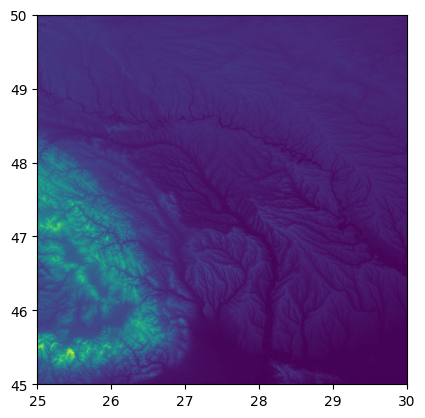

<Axes: >

In [12]:
import rasterio as rio
from rasterio.plot import show
def rasterio_open(f):
    return rio.open(f)

src_image = rasterio_open('srtm_42_03.tif')
print(src_image.profile)
show(src_image)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 19, 'height': 8, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00013474729261792824, 0.0, 26.294736315732678,
       0.0, -0.00013474729261792824, 47.461225432731304), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}


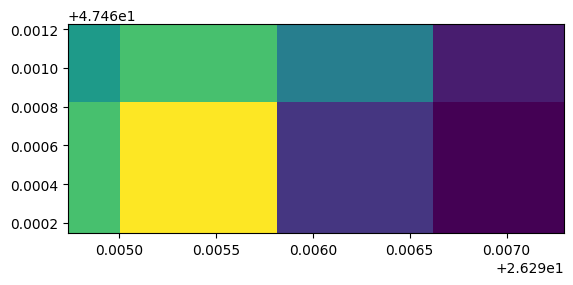

<Axes: >

In [13]:
src_image = rasterio_open('/content/drive/MyDrive/earth_engine_exports/falticeni.tif')
print(src_image.profile)
show(src_image)

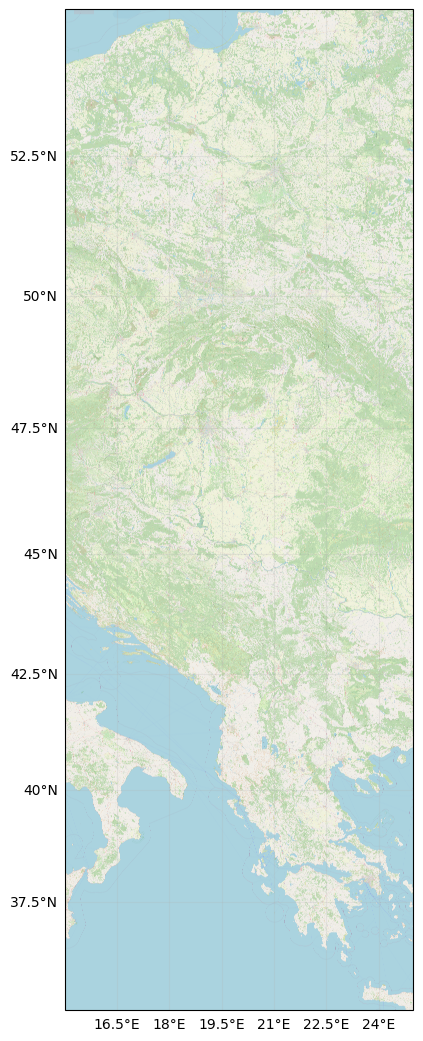

In [14]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import cartopy.io.img_tiles as cimgt

extent = [15, 25, 55, 35]

request = cimgt.OSM()

fig = plt.figure(figsize=(9, 13))
ax = plt.axes(projection=request.crs)
gl = ax.gridlines(draw_labels=True, alpha=0.2)
gl.top_labels = gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.set_extent(extent)

ax.add_image(request, 11)

plt.show()

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


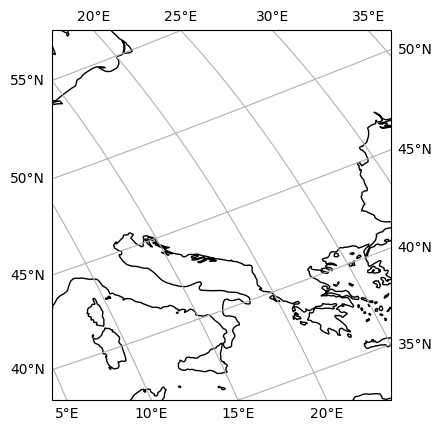

In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

rotated_crs = ccrs.RotatedPole(pole_longitude=120.0, pole_latitude=70.0)

ax = plt.axes(projection=rotated_crs)
ax.set_extent([15, 25, 55, 35], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.show()